<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 15 Plotting in Julia

## Plotting in Julia

There are a number of popular plotting libraries for Julia, each with their own tradeoffs. Here we'll give a brief overview of one of the most popular - **Plots.jl** - as it is the easiest to pick up, and is very flexible.

We'd also recommend installing **LaTeXStrings.jl** as well, which provides a special L"" string format that parses LaTeX markup inside the string, as it makes titles etc. for plots much more professional.

As always, we need to load the library first:

## Basic plots

If you didn't install it already, you would need to use Pkg to add Plots first

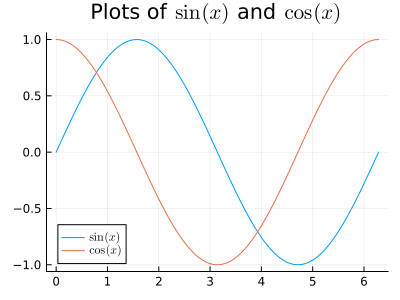

In [39]:
using Plots, LaTeXStrings
x = range(0, 2π, length=100)
y1 = sin.(x)
y2 = cos.(x);
p = plot(x,[y1 y2], 
        title=L"Plots of $\sin(x)$ and $\cos(x)$", 
        label=[L"\sin(x)" L"\cos(x)"],
        size=(400, 300)) 

We can easily modify a plot object to add new graphs:

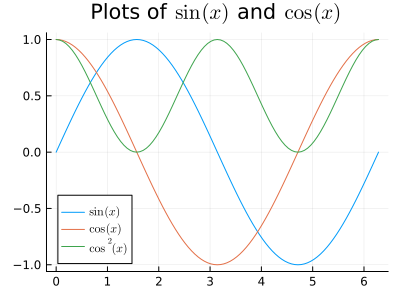

In [26]:
cos2(x) = cos(x)^2 
plot!(p, x, cos2, label=L"\cos^2(x)")
# or plot!(x, y.^2, label=L"\cos^2(x)") since this is the "active" plot

## Plot Properties

Plot takes the usual options to specify properties of the plot, as you will have seen above.

Some of these have special functions to allow us to quickly modify only them in a plot (without needing a whole plot! function call): 

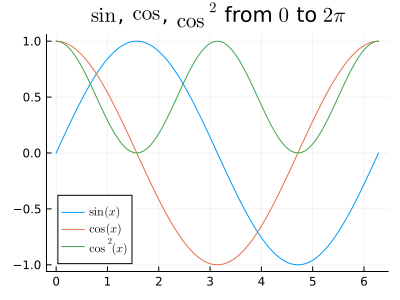

In [27]:
title!(L"$\sin$, $\cos$, $\cos^2$ from $0$ to $2\pi$")

## Log plots

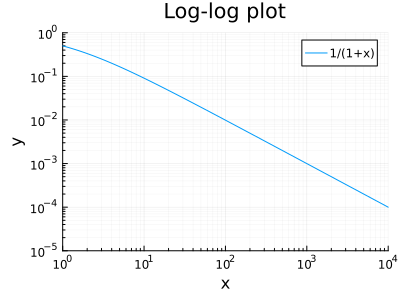

In [40]:
x = 10 .^ range(0, 4, length=100)
y = @. 1/(1+x)

plot(x, y, label="1/(1+x)", xscale=:log10, yscale=:log10, 
    minorgrid=true, size=(400, 300))
xlims!(1e+0, 1e+4)
ylims!(1e-5, 1e+0)
title!("Log-log plot")
xlabel!("x")
ylabel!("y")

## Data with error bars

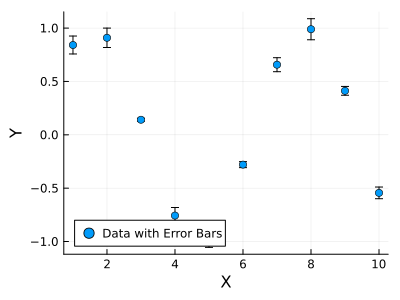

In [22]:
# Sample data
x = 1:10
y = sin.(x) 
y_errors = 0.1 .* y  # Example error values

# Plot with error bars
scatter(x, y, yerr=y_errors, markershape=:circle, label="Data with Error Bars", size=(400, 300))
xlabel!("X")
ylabel!("Y")

## Saving figures

Saving plots is done by the savefig command. For example:

In [28]:
savefig("myplot.png")      # saves the CURRENT_PLOT as a .png
savefig(p, "myplot.pdf")   # saves the plot from p as a .pdf vector graphic

"/Users/reygers/uni/Vorlesungen/Julia-Kurs 2024/notebooks/myplot.pdf"

## Create a multi-panel plot

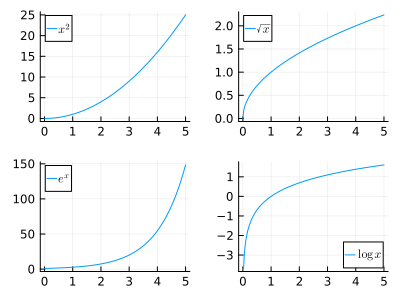

In [43]:
x = range(0, 5., length=200)
plot(x, (x->x^2).(x), label=L"x^2", subplot=1, layout=(2,2), size=(400, 300))
plot!(x, (x->sqrt(x)).(x), label=L"\sqrt{x}", subplot=2)
plot!(x, (x->exp(x)).(x), label=L"e^x", subplot=3)
plot!(x, (x->log(x)).(x), label=L"\log x", subplot=4)

## 3D Plots

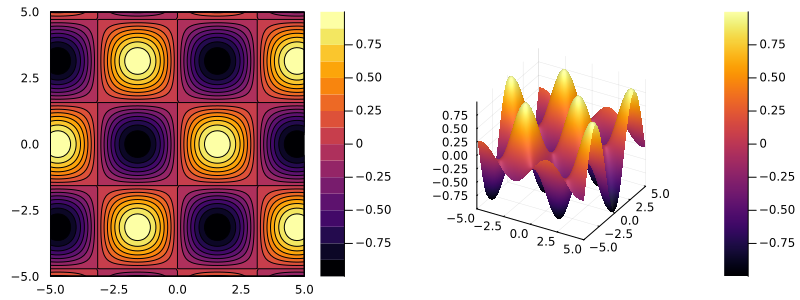

In [57]:
x = y = range(-5, 5, length=100)
f(x, y) = sin(x)*cos(y)
p1 = contour(x, y, f, fill=true)
p2 = surface(x, y, f)
plot(p1, p2, layout=2, size=(800,300))